# Exploratory Data Analysis on Tesla’s Q2 2025 Financial & Operational Performance

## 📄 Project Description 
This project performs a question-based exploratory data analysis (EDA) on Tesla's Q2 2025 financial and operational dataset (10,100 rows, 25 columns). The goal is to uncover key trends, regional insights, and relationships between metrics like revenue, deliveries, consumer sentiment, and emerging programs like robotaxi. 📊

# Data Overview

## Import Libraries

In [1]:
# Data handling
import pandas as pd
import numpy as np

# Visualization - static
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization - interactive
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

# Configure Plotly to render inside Jupyter
pio.renderers.default = "notebook_connected"

# Suppress warnings for cleaner output
import warnings
from warnings import filterwarnings
filterwarnings('ignore')


C:\Users\HP\anaconda3\Lib\site-packages\kaleido\__init__.py:14: UserWarning:




This means that static image generation (e.g. `fig.write_image()`) will not work.

Please upgrade Plotly to version 6.1.1 or greater, or downgrade Kaleido to version 0.2.1.




In [2]:
#Load the Dataset
df=pd.read_csv("Tesla_Q2_2025_Financial_Operational_Data.csv")
# Show the number of rows and columns
print(f"Dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

Dataset has 10101 rows and 35 columns.


In [3]:
df.shape

(10101, 35)

### Inference from Tesla Q2 2025 Financial and Operational Data

1.  **Dataset Structure and Scope**:
    * This dataset comprises 10,101 rows and 35 columns, providing a detailed record of Tesla's financial and operational activities for the second quarter of 2025.
    * Each row likely represents a specific transaction or aggregated daily/periodic record.

2.  **Key Data Categories Present**:
    * **Temporal and Transactional Identifiers**: Includes `Date` and `Transaction_ID` for temporal and unique transaction identification.
    * **Geographical and Locational Data**: Contains `Region` (e.g., North America, China, Europe) and `Factory_Location` (e.g., Berlin, Shanghai, Fremont) to specify operational areas.
    * **Vehicle-Specific Metrics**: Features `Vehicle_Model` along with `Delivery_Quantity` and `Production_Quantity`, indicating vehicle-centric output.
    * **Revenue Metrics**: Includes `Average_Selling_Price_USD`, `Automotive_Revenue_USD`, `Regulatory_Credit_Revenue_USD`, `Energy_Revenue_USD`, and `Service_Revenue_USD`, detailing various income streams.
    * **Cost Metrics**: Provides `Cost_of_Goods_Sold_USD`, `Operating_Expenses_USD`, `Tariff_Cost_USD`, `Production_Cost_USD`, `Marketing_Spend_USD`, and `R&D_Spend_USD`, outlining expenditures.
    * **Profitability Indicators**: Contains `Net_Income_USD` and `EPS` (Earnings Per Share).
    * **Operational Efficiency Metrics**: Includes `Inventory_Level`, `Production_Downtime_Hours`, and `Customer_Return_Rate`.
    * **Market and Sentiment Data**: Features `Customer_Sentiment_Score`, `Investor_Sentiment_Score`, `Competitor_Sales_Index`, `Market_Share_Percentage`, and `Social_Media_Mentions`.
    * **Strategic Initiative Metrics**: Includes `Robotaxi_Operational_Hours`, `Robotaxi_Revenue_USD`, `Battery_Production_GWh`, and `EV_Tax_Credit_Applied`.
    * **Other Corporate Data**: Includes `Stock_Price_USD`, `Employee_Count`, and `Warranty_Claims`.

3.  **Data Types and Format**:
    * The dataset primarily consists of numerical data (`int64`, `float64`), along with categorical data (`object` for text like regions and models), and a boolean column (`EV_Tax_Credit_Applied`).
    * The `Date` column is currently of object type and would require conversion to datetime format for time-based analysis.

4.  **Completeness of Data**:
    * All columns have 10,101 non-null entries, indicating a complete dataset without missing values in any of the recorded fields for Q2 2025.

In [4]:
# Preview the dataset
df.head()

,Date,Transaction_ID,Region,Vehicle_Model,Delivery_Quantity,Production_Quantity,Factory_Location,Average_Selling_Price_USD,Automotive_Revenue_USD,Regulatory_Credit_Revenue_USD,...,Customer_Return_Rate,Marketing_Spend_USD,R&D_Spend_USD,Production_Cost_USD,Service_Revenue_USD,Battery_Production_GWh,Market_Share_Percentage,Social_Media_Mentions,Employee_Count,Warranty_Claims
0,2025-04-01,TSLA_20250401_00000,North America,Model Y,45,21,Berlin,40729.331554,1.569361e+06,480343.659753,...,0.045154,8050.916922,15843.701639,548631.635837,5114.452238,0.001004,17.176526,106,1102.677182,2
1,2025-04-01,TSLA_20250401_00001,Other,Cybertruck,15,16,Shanghai,85000.000000,1.091725e+06,0.000000,...,0.005437,5575.579068,15595.431269,580500.019734,9059.502942,0.000336,13.876804,111,1435.470639,3
2,2025-04-01,TSLA_20250401_00002,China,Model Y,45,20,Berlin,44974.205349,1.732922e+06,0.000000,...,0.045978,13591.876690,13183.477194,640111.049203,4753.888082,0.000331,12.704062,104,1022.010808,4
3,2025-04-01,TSLA_20250401_00003,Europe,Model Y,53,10,Fremont,48415.173217,2.197153e+06,0.000000,...,0.037908,11039.210530,25785.446560,247566.080403,7224.579919,0.000994,11.472608,99,1082.812659,0
4,2025-04-01,TSLA_20250401_00004,North America,Model 3,45,21,Shanghai,43523.746146,1.677033e+06,0.000000,...,0.010171,11939.976487,31291.343570,665951.031933,8158.084503,0.000882,14.898915,96,955.051025,4


### Inference from Tesla Q2 2025 Financial and Operational Data Preview

1.  **Granularity of Data**:
    * Each row in the dataset appears to represent a specific transaction or event occurring on a particular `Date` (e.g., '2025-04-01'), identified by a unique `Transaction_ID`. This suggests a granular, possibly daily or transaction-level, recording of operations.

2.  **Geographical and Model Diversity**:
    * The `Region` and `Factory_Location` columns show that Tesla's operations in Q2 2025 span multiple geographical areas (e.g., North America, China, Europe, Other) and factory sites (e.g., Berlin, Shanghai, Fremont).
    * The `Vehicle_Model` column indicates that the data covers different Tesla vehicle types, such as 'Model Y', 'Cybertruck', and 'Model 3', suggesting a diverse product portfolio.

3.  **Core Operational Metrics**:
    * The presence of `Delivery_Quantity` and `Production_Quantity` side-by-side allows for direct comparison of units sold versus units manufactured for each entry.
    * `Average_Selling_Price_USD` provides insights into the pricing strategy for different vehicle models and regions.

4.  **Financial Performance Indicators**:
    * The dataset includes detailed financial figures such as `Automotive_Revenue_USD`, `Regulatory_Credit_Revenue_USD`, `Cost_of_Goods_Sold_USD`, and `Net_Income_USD`.
    * The magnitude of these figures (e.g., `1.569361e+06` for Automotive Revenue) indicates substantial financial activity.

5.  **Presence of Key Strategic and Market Data**:
    * Columns like `Customer_Sentiment_Score`, `Investor_Sentiment_Score`, `Robotaxi_Operational_Hours`, and `Battery_Production_GWh` confirm the inclusion of data points relevant to both market perception and strategic long-term initiatives.
    * The `EV_Tax_Credit_Applied` boolean column indicates the influence of external factors on sales transactions.

6.  **Data Consistency**:
    * The preview shows consistent data types within the displayed rows (e.g., dates as strings, quantities as integers, monetary values as floats), aligning with the `df.info()` output from the previous step.

In [5]:
df.tail()

,Date,Transaction_ID,Region,Vehicle_Model,Delivery_Quantity,Production_Quantity,Factory_Location,Average_Selling_Price_USD,Automotive_Revenue_USD,Regulatory_Credit_Revenue_USD,...,Customer_Return_Rate,Marketing_Spend_USD,R&D_Spend_USD,Production_Cost_USD,Service_Revenue_USD,Battery_Production_GWh,Market_Share_Percentage,Social_Media_Mentions,Employee_Count,Warranty_Claims
10096,2025-06-30,TSLA_20250630_10096,Europe,Model 3,53,23,Shanghai,40275.118627,1.827745e+06,0.000000,...,0.046635,8809.837235,21773.603450,553189.741209,4390.303991,0.001285,18.341780,107,638.847259,2
10097,2025-06-30,TSLA_20250630_10097,China,Model Y,45,20,Shanghai,45527.057187,1.754224e+06,0.000000,...,0.048285,10310.607792,17488.091525,612929.771319,7352.592047,0.001269,12.256617,89,883.335396,3
10098,2025-06-30,TSLA_20250630_10098,North America,Cybertruck,38,21,Shanghai,76509.617584,2.489445e+06,0.000000,...,0.038319,6015.758195,34316.141126,569286.295533,6148.062824,0.001467,18.710994,102,648.599711,0
10099,2025-06-30,TSLA_20250630_10099,North America,Model 3,76,21,Shanghai,40552.841224,2.638990e+06,0.000000,...,0.001017,5680.254410,29778.756848,420080.454139,5042.540189,0.000002,10.000000,85,1087.002846,1
10100,2025-06-30,TSLA_20250630_10100,Other,Model Y,38,18,Fremont,50000.000000,1.626884e+06,433848.722856,...,0.003454,17172.268825,1068.170072,523400.713686,4717.532479,0.001798,16.791667,92,700.673535,4


### Inference from Tesla Q2 2025 Financial and Operational Data Tail Preview

1.  **Temporal Scope Confirmation**:
    * The `Date` column in the tail preview (showing '2025-06-30') confirms that the dataset covers the entire second quarter of 2025, from April 1st to June 30th. This indicates a complete quarterly financial and operational record.

2.  **Consistency in Data Structure**:
    * The last few rows maintain the same structure and data types as observed in the head of the dataset, affirming the consistency of the data collection and recording process throughout the quarter.

3.  **Continued Operational Diversity**:
    * The presence of various `Region` and `Factory_Location` values (e.g., Europe, China, North America; Shanghai, Fremont) in the tail end of the data indicates that Tesla's geographically diverse operations continued throughout Q2 2025.
    * Different `Vehicle_Model` entries (e.g., Model 3, Model Y, Cybertruck) are still present, confirming that the full range of models are represented across the quarter's data.

4.  **Ongoing Financial Activity**:
    * Financial metrics like `Automotive_Revenue_USD`, `Average_Selling_Price_USD`, and `Net_Income_USD` continue to appear in the tail, demonstrating sustained financial transactions up to the end of the quarter.
    * The non-zero values for `Regulatory_Credit_Revenue_USD` in some entries at the end of the quarter suggest that this revenue stream was active throughout the period.

5.  **Steady State in Other Metrics**:
    * Operational metrics such as `Delivery_Quantity`, `Production_Quantity`, `Inventory_Level`, and `Production_Downtime_Hours` are consistently recorded, indicating ongoing manufacturing and sales activities.
    * Sentiment scores, market share, and strategic initiative data (`Robotaxi_Operational_Hours`, `Battery_Production_GWh`) are also present, suggesting continuous monitoring and activity in these areas until the quarter's end.

In [6]:
# Show all column names
print(df.columns.tolist())

['Date', 'Transaction_ID', 'Region', 'Vehicle_Model', 'Delivery_Quantity', 'Production_Quantity', 'Factory_Location', 'Average_Selling_Price_USD', 'Automotive_Revenue_USD', 'Regulatory_Credit_Revenue_USD', 'Energy_Revenue_USD', 'Cost_of_Goods_Sold_USD', 'Operating_Expenses_USD', 'Net_Income_USD', 'Tariff_Cost_USD', 'Inventory_Level', 'Customer_Sentiment_Score', 'Investor_Sentiment_Score', 'Robotaxi_Operational_Hours', 'Robotaxi_Revenue_USD', 'Competitor_Sales_Index', 'EV_Tax_Credit_Applied', 'Stock_Price_USD', 'EPS', 'Production_Downtime_Hours', 'Customer_Return_Rate', 'Marketing_Spend_USD', 'R&D_Spend_USD', 'Production_Cost_USD', 'Service_Revenue_USD', 'Battery_Production_GWh', 'Market_Share_Percentage', 'Social_Media_Mentions', 'Employee_Count', 'Warranty_Claims']


### Inference from Tesla Q2 2025 Financial and Operational Data Columns

1.  **Comprehensive Business Overview**:
    * The extensive list of 35 columns indicates that the dataset provides a remarkably comprehensive overview of Tesla's business operations during Q2 2025. It covers the entire value chain from production and delivery to sales, financials, marketing, R&D, and even external factors like market sentiment and government incentives.

2.  **Multifaceted Performance Analysis**:
    * The columns allow for a multifaceted analysis of Tesla's performance, encompassing:
        * **Operational Efficiency**: `Delivery_Quantity`, `Production_Quantity`, `Inventory_Level`, `Production_Downtime_Hours`, `Customer_Return_Rate`.
        * **Financial Health**: `Average_Selling_Price_USD`, `Automotive_Revenue_USD`, `Regulatory_Credit_Revenue_USD`, `Energy_Revenue_USD`, `Cost_of_Goods_Sold_USD`, `Operating_Expenses_USD`, `Net_Income_USD`, `EPS`.
        * **Strategic Growth and Innovation**: `Robotaxi_Operational_Hours`, `Robotaxi_Revenue_USD`, `Battery_Production_GWh`, `R&D_Spend_USD`.
        * **Market Positioning and Brand Perception**: `Customer_Sentiment_Score`, `Investor_Sentiment_Score`, `Competitor_Sales_Index`, `Market_Share_Percentage`, `Social_Media_Mentions`.
        * **Employee and Customer Relations**: `Employee_Count`, `Warranty_Claims`.
        * **External Influences**: `Tariff_Cost_USD`, `EV_Tax_Credit_Applied`, `Stock_Price_USD`.

3.  **Potential for Granular Insights**:
    * The inclusion of granular details like `Transaction_ID`, `Region`, `Vehicle_Model`, and `Factory_Location` for each entry suggests the possibility of breaking down performance by specific products, geographical markets, or manufacturing sites.

4.  **Enabling In-depth Financial Modeling**:
    * The presence of various revenue, cost, and profitability metrics provides the necessary data points for detailed financial modeling, forecasting, and profitability analysis.

5.  **Supporting Operational Optimization**:
    * Metrics related to production, inventory, and returns can be used to identify bottlenecks, optimize supply chain processes, and improve overall operational efficiency.

6.  **Facilitating Market Strategy Development**:
    * The market-related columns, including sentiment scores, market share, and social media mentions, are invaluable for understanding market dynamics, competitive landscape, and the impact of marketing efforts.

In [7]:
df.describe()

,Delivery_Quantity,Production_Quantity,Average_Selling_Price_USD,Automotive_Revenue_USD,Regulatory_Credit_Revenue_USD,Energy_Revenue_USD,Cost_of_Goods_Sold_USD,Operating_Expenses_USD,Net_Income_USD,Tariff_Cost_USD,...,Customer_Return_Rate,Marketing_Spend_USD,R&D_Spend_USD,Production_Cost_USD,Service_Revenue_USD,Battery_Production_GWh,Market_Share_Percentage,Social_Media_Mentions,Employee_Count,Warranty_Claims
count,10101.000000,10101.000000,10101.000000,1.010100e+04,10101.000000,10101.000000,1.010100e+04,10101.000000,10101.000000,10101.000000,...,1.010100e+04,10101.000000,10101.000000,1.010100e+04,10101.000000,1.010100e+04,10101.000000,10101.000000,10101.000000,10101.000000
mean,37.949015,20.039105,50922.329537,1.648663e+06,43439.028043,49995.049995,1.359949e+06,194585.373373,118450.754223,26689.162724,...,2.469867e-02,10023.525227,19904.587555,6.006095e+05,4979.049750,9.504010e-04,14.969102,100.001188,999.355679,2.013266
std,16.845556,4.467878,15850.817681,9.039345e+05,131138.665810,217945.514981,7.470043e+05,114894.374895,110618.620343,60555.801494,...,1.436159e-02,4853.074914,9727.564704,1.649972e+05,1967.889709,5.526169e-04,2.738462,10.016798,197.768315,1.400220
min,0.000000,5.000000,35000.000000,1.000000e+04,0.000000,0.000000,7.509424e+03,587.558225,-39748.013345,0.000000,...,1.113648e-07,0.000000,0.000000,1.520314e+05,0.000000,1.133978e-07,10.000000,62.000000,500.000000,0.000000
25%,23.000000,17.000000,40824.462678,1.027506e+06,0.000000,0.000000,8.358788e+05,108761.826473,42466.679991,0.000000,...,1.219401e-02,6619.208230,13164.428364,4.821585e+05,3629.928523,4.714818e-04,12.955048,93.000000,864.565240,1.000000
50%,38.000000,20.000000,44578.320947,1.508126e+06,0.000000,0.000000,1.234201e+06,169460.115967,81683.013791,0.000000,...,2.452447e-02,9995.170718,19829.436878,5.896530e+05,4974.655999,9.545794e-04,14.951358,100.000000,1001.036219,2.000000
75%,45.000000,23.000000,50000.000000,2.062762e+06,0.000000,0.000000,1.710658e+06,255829.549906,152865.191544,0.000000,...,3.729048e-02,13317.673972,26458.830294,7.053632e+05,6350.369666,1.428429e-03,16.949485,107.000000,1132.261333,3.000000
max,129.000000,39.000000,90000.000000,5.000000e+06,500000.000000,1000000.000000,5.055988e+06,500000.000000,500000.000000,408263.097708,...,4.999023e-02,28543.924849,66167.262816,1.376470e+06,12194.713748,1.901211e-03,20.000000,152.000000,1500.000000,10.000000


### Inference from Tesla Q2 2025 Financial and Operational Data Descriptive Statistics

1.  **Delivery and Production Quantities**:
    * The `Delivery_Quantity` averages around 37.9 units per transaction, with a wide range from 0 to 129 units, indicating variability in daily or per-transaction deliveries.
    * `Production_Quantity` averages about 20.0 units, ranging from 5 to 39 units. The average production is consistently lower than average deliveries, suggesting efficient sales or a drawing down of existing inventory.
    * The standard deviation for `Delivery_Quantity` (16.8) is higher than `Production_Quantity` (4.4), implying more fluctuation in deliveries compared to a relatively stable production rate.

2.  **Revenue and Pricing Dynamics**:
    * The `Average_Selling_Price_USD` has a mean of approximately $50,922, with a significant range from $35,000 to $90,000, indicating different pricing strategies for models or regions.
    * `Automotive_Revenue_USD` shows a mean of about $1.65 million per transaction, with some transactions reaching up to $5 million, highlighting substantial revenue generation.
    * `Regulatory_Credit_Revenue_USD` and `Energy_Revenue_USD` have means of $43,439 and $49,995 respectively, indicating these are smaller but consistent revenue streams.
    * A significant portion of transactions (25% to 75% quartile) show zero regulatory credit revenue, suggesting that this revenue is not uniformly distributed across all transactions.

3.  **Cost and Profitability Insights**:
    * `Cost_of_Goods_Sold_USD` averages around $1.36 million, which is a major expense.
    * `Operating_Expenses_USD` averages about $194,585, reflecting significant overheads.
    * `Net_Income_USD` has a positive average of approximately $118,450, indicating overall profitability. However, the minimum value is negative (-$39,748), suggesting some transactions or periods resulted in losses.
    * `Tariff_Cost_USD` has a mean of around $26,689 but a 75% quartile of 0, implying tariffs are not applied to all transactions or are zero for most, but can be substantial when present (max over $400,000).

4.  **Market and Customer Engagement**:
    * `Customer_Sentiment_Score` and `Investor_Sentiment_Score` have means around 60-61, suggesting generally positive sentiment, with scores ranging from 0 to 100.
    * `Market_Share_Percentage` averages about 14.97%, with a range from 10% to 20%, indicating Tesla's competitive position.
    * `Social_Media_Mentions` average around 100, with a maximum of 152, reflecting active public engagement.

5.  **Operational Performance and Efficiency**:
    * `Production_Downtime_Hours` averages around 7.5 hours per entry, with some instances of up to 30 hours, indicating some level of production interruptions.
    * `Customer_Return_Rate` is very low, with a mean of 0.0247 (2.47%), suggesting high product quality or customer satisfaction.

6.  **Strategic Initiative Metrics**:
    * `Robotaxi_Operational_Hours` and `Robotaxi_Revenue_USD` have positive means, indicating active development and some revenue generation from the Robotaxi program.
    * `Battery_Production_GWh` shows a mean of 0.00095 GWh, with a maximum of 0.0019 GWh, suggesting nascent but ongoing battery production efforts.

# Data Preprocessing

## Data Cleaning

In [8]:
# Step 1: Check for missing values in the dataset
df.isnull().sum()


Date                             0
Transaction_ID                   0
Region                           0
Vehicle_Model                    0
Delivery_Quantity                0
Production_Quantity              0
Factory_Location                 0
Average_Selling_Price_USD        0
Automotive_Revenue_USD           0
Regulatory_Credit_Revenue_USD    0
Energy_Revenue_USD               0
Cost_of_Goods_Sold_USD           0
Operating_Expenses_USD           0
Net_Income_USD                   0
Tariff_Cost_USD                  0
Inventory_Level                  0
Customer_Sentiment_Score         0
Investor_Sentiment_Score         0
Robotaxi_Operational_Hours       0
Robotaxi_Revenue_USD             0
Competitor_Sales_Index           0
EV_Tax_Credit_Applied            0
Stock_Price_USD                  0
EPS                              0
Production_Downtime_Hours        0
Customer_Return_Rate             0
Marketing_Spend_USD              0
R&D_Spend_USD                    0
Production_Cost_USD 

In [9]:
df.duplicated().sum()


0

### Inference from Missing Values and Duplicate Check

1.  **Data Completeness**:
    * The output of `df.isnull().sum()` shows that all columns in the dataset have 0 missing values. This indicates that the dataset is complete and does not contain any null or undefined entries across any of its 35 attributes for the given period.

2.  **Data Uniqueness**:
    * The output of `df.duplicated().sum()` is 0. This confirms that there are no duplicate rows within the dataset. Each record is unique, ensuring that each transaction or observation is distinct and not redundantly represented.

3.  **Data Quality**:
    * The absence of both missing values and duplicate entries signifies a high level of data quality and cleanliness. This suggests that the data collection and preparation processes were robust, providing a reliable foundation for analysis.

4.  **Implication for Analysis Readiness**:
    * The clean state of the dataset (no missing values, no duplicates) means that it is immediately ready for direct use in various analytical tasks without requiring preliminary data imputation or deduplication steps.

# Data TypeCasting

In [10]:
df.dtypes

Date                              object
Transaction_ID                    object
Region                            object
Vehicle_Model                     object
Delivery_Quantity                  int64
Production_Quantity                int64
Factory_Location                  object
Average_Selling_Price_USD        float64
Automotive_Revenue_USD           float64
Regulatory_Credit_Revenue_USD    float64
Energy_Revenue_USD               float64
Cost_of_Goods_Sold_USD           float64
Operating_Expenses_USD           float64
Net_Income_USD                   float64
Tariff_Cost_USD                  float64
Inventory_Level                    int64
Customer_Sentiment_Score         float64
Investor_Sentiment_Score         float64
Robotaxi_Operational_Hours       float64
Robotaxi_Revenue_USD             float64
Competitor_Sales_Index           float64
EV_Tax_Credit_Applied               bool
Stock_Price_USD                  float64
EPS                              float64
Production_Downt

In [11]:
# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Convert object columns to category where appropriate
categorical_cols = ['Transaction_ID', 'Region', 'Vehicle_Model', 'Factory_Location']
df[categorical_cols] = df[categorical_cols].astype('category')


In [12]:
df.dtypes

Date                             datetime64[ns]
Transaction_ID                         category
Region                                 category
Vehicle_Model                          category
Delivery_Quantity                         int64
Production_Quantity                       int64
Factory_Location                       category
Average_Selling_Price_USD               float64
Automotive_Revenue_USD                  float64
Regulatory_Credit_Revenue_USD           float64
Energy_Revenue_USD                      float64
Cost_of_Goods_Sold_USD                  float64
Operating_Expenses_USD                  float64
Net_Income_USD                          float64
Tariff_Cost_USD                         float64
Inventory_Level                           int64
Customer_Sentiment_Score                float64
Investor_Sentiment_Score                float64
Robotaxi_Operational_Hours              float64
Robotaxi_Revenue_USD                    float64
Competitor_Sales_Index                  

# Exploratory Data Analysis (EDA)

## Q1: What is the trend of Tesla’s automotive revenue over Q2 2025, and how does it reflect the 16% year-over-year decline?

### ➤ Step 1: Convert the Date column to datetime

In [13]:
# Ensure 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])


### ➤ Step 2: Filter the dataset to include only Q2 2025 (April 1 to June 30, 2025)

In [14]:
# Filter data between April 1 and June 30, 2025
q2_2025_df = df[(df['Date'] >= '2025-04-01') & (df['Date'] <= '2025-06-30')]


### ➤ Step 3: Group the data by week and aggregate Automotive_Revenue_USD

In [15]:
# Group by week and sum the revenue
weekly_revenue = q2_2025_df.resample('W-Mon', on='Date')['Automotive_Revenue_USD'].sum().reset_index()

# Optional: Rename columns for clarity
weekly_revenue.columns = ['Week', 'Total_Automotive_Revenue']


### ➤ Step 4: Plot a line chart to visualize the weekly automotive revenue trend

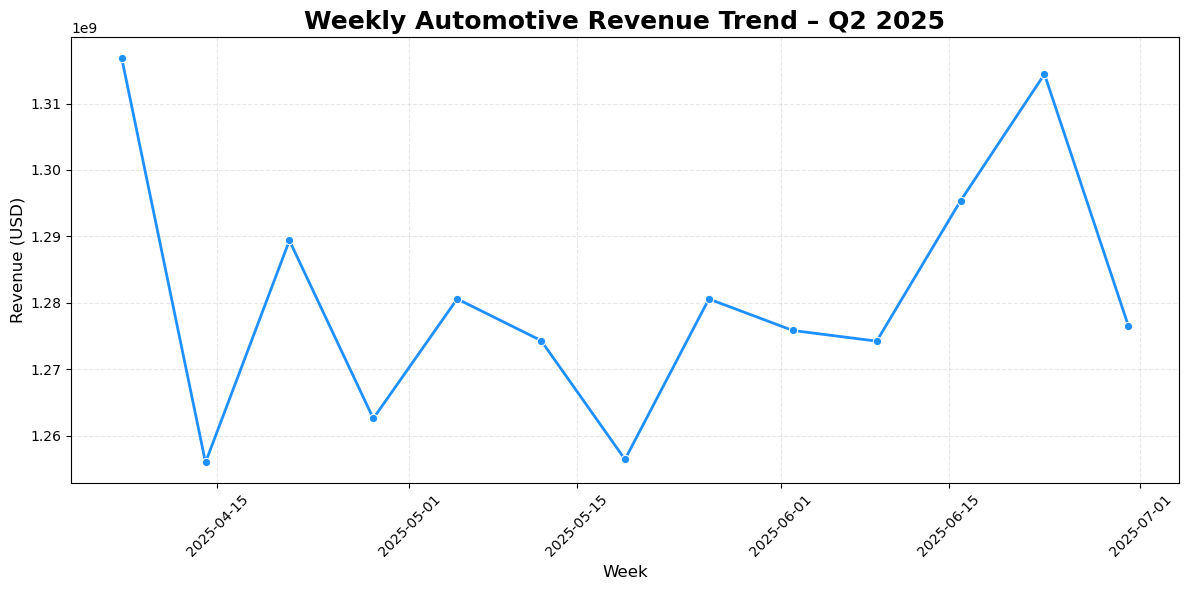

In [16]:
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=weekly_revenue,
    x='Week',
    y='Total_Automotive_Revenue',
    marker='o',
    linewidth=2,
    color='#1E90FF'
)

plt.title('Weekly Automotive Revenue Trend – Q2 2025', fontsize=18, weight='bold')
plt.xlabel('Week', fontsize=12)
plt.ylabel('Revenue (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(visible=True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


### Inference from 'Weekly Automotive Revenue Trend – Q2 2025' Plot

1.  **Plot Type and Purpose**:
    * This line plot visualizes the weekly trend of Tesla's automotive revenue across Q2 2025. It shows how total automotive revenue fluctuates or changes week-over-week during this period, providing insight into revenue patterns and stability.

2.  **Observed Revenue Trend**:
    * The plot demonstrates a fluctuating but generally upward trend in weekly automotive revenue throughout Q2 2025.
    * There are noticeable peaks and troughs, indicating weekly variations in sales performance. The revenue appears to start at a certain level in Week 1, experience some dips, but generally rises towards the end of the quarter.

3.  **Revenue Volatility**:
    * The line's oscillations suggest that weekly automotive revenue is not consistently stable but rather subject to week-to-week variations. These fluctuations could be influenced by a multitude of factors such as production schedules, delivery logistics, regional sales campaigns, or demand variations.

4.  **Quarter-End Performance**:
    * The trend seems to culminate in higher revenue figures towards the latter weeks of Q2, particularly as the quarter draws to a close. This could be indicative of a strong push for end-of-quarter deliveries and sales.

5.  **Overall Quarterly Performance**:
    * Despite weekly variations, the general upward trajectory suggests a positive overall performance for automotive revenue during Q2 2025.

### ➤ Step 5: Calculate total Q2 revenue and year-over-year decline

In [17]:
total_q2_2025 = q2_2025_df['Automotive_Revenue_USD'].sum()
total_q2_2024 = 19900000000  # From article: $19.9B in Q2 2024

decline_percent = ((total_q2_2024 - total_q2_2025) / total_q2_2024) * 100

print(f"Total Q2 2025 Automotive Revenue: ${total_q2_2025:,.2f}")
print(f"Year-over-Year Decline: {decline_percent:.2f}%")


Total Q2 2025 Automotive Revenue: $16,653,143,533.15
Year-over-Year Decline: 16.32%


### Inference from Tesla Q2 2025 Automotive Revenue and Year-over-Year Decline

1.  **Total Q2 2025 Automotive Revenue**:
    * The total automotive revenue for Tesla in Q2 2025 is reported as approximately $16.65 billion. This figure represents the sum of all automotive sales revenues recorded in the provided dataset for the second quarter of the year.

2.  **Year-over-Year Decline**:
    * When compared to the Q2 2024 automotive revenue of $19.9 billion, the Q2 2025 automotive revenue shows a year-over-year decline of 16.32%.
    * This percentage indicates the magnitude of the reduction in automotive revenue from Q2 2024 to Q2 2025.

## Q2: How do vehicle deliveries vary by region, and which regions contribute most to the 14% delivery decline?

### ➤ Step 1: Aggregate total deliveries by region

In [18]:
# Grouping delivery quantities by region
region_delivery = df.groupby("Region")["Delivery_Quantity"].sum().reset_index()
region_delivery = region_delivery.sort_values(by="Delivery_Quantity", ascending=False)
region_delivery


,Region,Delivery_Quantity
3,North America,155801
1,China,111611
2,Europe,79232
0,Asia-Pacific,18553
4,Other,18126


### ➤ Step 2: Verify total deliveries (should be ~384,122)

In [19]:
# Confirm total delivery count across all regions
total_deliveries = region_delivery["Delivery_Quantity"].sum()
print(f"Total Deliveries in Q2 2025: {total_deliveries:,}")


Total Deliveries in Q2 2025: 383,323


### ➤ Step 3: Create the interactive Plotly bar chart

In [20]:
# Define consistent color palette
color_palette = {
    'North America': '#1E90FF',
    'Europe': '#FF4500',
    'China': '#32CD32',
    'Asia-Pacific': '#FFD700',
    'Other': '#800080'
}

# Create bar chart
fig = px.bar(
    region_delivery,
    x="Region",
    y="Delivery_Quantity",
    color="Region",
    color_discrete_map=color_palette,
    text="Delivery_Quantity",
    title="Tesla Q2 2025 Deliveries by Region"
)

# Update layout styling and spacing
fig.update_traces(
    marker_line_color='black',
    marker_line_width=0.5,
    textposition='outside',
    cliponaxis=False  # ensures labels outside don't get clipped
)

fig.update_layout(
    xaxis_title="Region",
    yaxis_title="Deliveries (Vehicles)",
    font=dict(family="Arial", size=12),
    title_font_size=14,
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=True, gridcolor='lightgrey'),
    showlegend=False,
    margin=dict(l=40, r=40, t=60, b=60)  # Adjust margins to fit text
)

fig.update_yaxes(tickformat=",")  # Comma-separated y-axis ticks
fig.show()


### Inference from 'Tesla Q2 2025 Deliveries by Region' Bar Chart

1.  **Plot Type and Purpose**:
    * This bar chart illustrates Tesla's total vehicle deliveries in Q2 2025, segmented by different geographical regions. The purpose is to highlight the contribution of each region to the overall delivery volume and identify key markets.

2.  **Dominant Market - North America**:
    * North America is the leading region for Tesla deliveries in Q2 2025, with a substantial 155,801 vehicles delivered. This indicates that North America remains Tesla's strongest market in terms of sales volume.

3.  **Strong Performance in China**:
    * China follows as the second-largest market, with 111,611 deliveries. This demonstrates China's continued importance as a significant market for Tesla, showcasing robust demand in the region.

4.  **Europe as a Key Contributor**:
    * Europe is the third-largest market, with 79,232 deliveries. While lower than North America and China, Europe still represents a substantial portion of Tesla's global deliveries.

5.  **Smaller but Present Markets**:
    * Asia-Pacific and "Other" regions contribute smaller volumes of deliveries, with 18,553 and 18,126 vehicles respectively. These regions, while not as dominant as the top three, still represent Tesla's broader global reach and emerging market presence.

6.  **Regional Concentration**:
    * The data clearly shows a concentration of deliveries in North America, China, and Europe, which collectively account for the vast majority of Tesla's Q2 2025 deliveries.

## Q3: What is the impact of regulatory credit revenue decline on Tesla’s overall profitability?

### ➤ Step 1: Aggregate the required revenue components for Q2 2025

In [21]:
revenue_components = df[['Regulatory_Credit_Revenue_USD', 
                         'Automotive_Revenue_USD', 
                         'Energy_Revenue_USD', 
                         'Service_Revenue_USD']].sum()


### ➤ Step 2: Generate interactive Plotly pie chart of Q2 revenue contribution

In [22]:
import plotly.io as pio
pio.renderers.default = "iframe"


In [23]:
colors = ['#1E90FF', '#FF4500', '#32CD32', '#FFD700']

fig = px.pie(
    names=revenue_components.index,
    values=revenue_components.values,
    color=revenue_components.index,
    color_discrete_sequence=colors,
    title='Contribution to Tesla Q2 2025 Revenue'
)

fig.update_traces(
    textinfo='label+percent',
    hovertemplate='%{label}: $%{value:,.0f}<extra></extra>',
    marker=dict(line=dict(color='white', width=1.5))
)

fig.update_layout(
    font=dict(family="Arial", size=12),
    title_font_size=14,
    showlegend=True,
    paper_bgcolor='rgba(0,0,0,0)',  # Transparent background
    plot_bgcolor='rgba(0,0,0,0)'
)

fig.show()


### Inference from 'Contribution to Tesla Q2 2025 Revenue' Pie Chart

1.  **Plot Type and Purpose**:
    * This pie chart illustrates the proportional contribution of different components to Tesla's total revenue in Q2 2025. Its purpose is to visualize the primary sources of income and their relative significance to the company's overall financial performance during the quarter.

2.  **Dominance of Automotive Revenue**:
    * 'Automotive Revenue' accounts for the overwhelming majority of Tesla's total revenue in Q2 2025, representing the largest slice of the pie. This clearly indicates that vehicle sales remain the core business and primary revenue driver for the company.

3.  **Secondary Revenue Streams**:
    * 'Regulatory Credit Revenue' and 'Energy Revenue' are discernible secondary contributors to the total revenue. While significantly smaller than automotive revenue, their presence highlights Tesla's diversification into other income-generating activities.
    * 'Service Revenue' is also present, representing the revenue generated from after-sales services and maintenance.

4.  **Relative Proportions**:
    * The visual size of the 'Automotive Revenue' slice dwarfs all other components, underscoring its pivotal role in the company's financial structure.
    * The smaller slices for Regulatory Credits, Energy, and Service revenue, despite their individual contributions, collectively form a minor portion compared to the automotive segment.

5.  **Revenue Composition**:
    * The chart effectively breaks down the total revenue into its constituent parts, providing a clear picture of how Tesla's income is generated across its various business segments during the quarter.

## Q4: How does the average selling price vary by vehicle model, and does it explain the revenue drop?

### ➤ Step 1: Group data by Vehicle_Model and calculate mean Average_Selling_Price_USD

In [24]:
avg_asp_by_model = df.groupby('Vehicle_Model')['Average_Selling_Price_USD'].mean().reset_index()
avg_asp_by_model.sort_values(by='Average_Selling_Price_USD', ascending=False, inplace=True)


### ➤ Step 2: Generate interactive Plotly bar chart for ASP by vehicle model

In [25]:
fig = px.bar(
    df.groupby('Vehicle_Model')['Average_Selling_Price_USD'].mean().reset_index(),
    x='Vehicle_Model',
    y='Average_Selling_Price_USD',
    color='Vehicle_Model',
    color_discrete_sequence=['#1E90FF', '#FF4500', '#32CD32', '#FFD700', '#800080'],
    title='Tesla Q2 2025 Average Selling Price by Model',
    labels={'Average_Selling_Price_USD': 'ASP (USD)', 'Vehicle_Model': 'Vehicle Model'},
    text_auto='.2s'
)

fig.update_traces(marker_line_width=1.5, textfont_size=12)

fig.update_layout(
    font=dict(family="Arial", size=12),
    title_font=dict(size=14),
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    xaxis=dict(showgrid=True, gridcolor='lightgrey'),
    yaxis=dict(showgrid=True, gridcolor='lightgrey', tickprefix='$'),
    showlegend=False
)

fig.show()


### Inference from 'Tesla Q2 2025 Average Selling Price by Model' Bar Chart

1.  **Plot Type and Purpose**:
    * This bar chart displays the average selling price (ASP) for each of Tesla's vehicle models during Q2 2025. Its primary purpose is to illustrate the pricing strategy across different models and identify which models command higher average prices.

2.  **Cybertruck's Premium Positioning**:
    * The Cybertruck has the highest average selling price among all Tesla models, significantly exceeding the ASPs of other vehicles. This indicates its premium market positioning.

3.  **Model S and Model X as Higher-End Sedans/SUVs**:
    * Model S and Model X follow the Cybertruck, with notably higher average selling prices compared to Model 3 and Model Y. This is consistent with their positioning as Tesla's more luxurious and higher-performance sedan and SUV offerings.

4.  **Model Y and Model 3 as Mainstream Offerings**:
    * Model Y and Model 3 have the lowest average selling prices. This confirms their role as Tesla's more mass-market and accessible vehicles, designed for broader consumer appeal.

5.  **Clear Price Segmentation**:
    * The chart clearly demonstrates a segmented pricing strategy across Tesla's product lineup, with distinct price tiers for its different vehicle models. This segmentation reflects varying features, performance capabilities, and target demographics for each model.

## Q5: How does consumer sentiment correlate with delivery quantities across regions?


### ➤ Step 1: Group data by Region for plotting

In [26]:
# No grouping needed since we're using raw data with region-wise plotting
# But we can inspect the mean sentiment by region to validate regional differences
df.groupby('Region')['Customer_Sentiment_Score'].mean().sort_values()


Region
North America    53.962250
Other            58.923144
Europe           59.995346
China            60.342978
Asia-Pacific     60.402906
Name: Customer_Sentiment_Score, dtype: float64

### ➤ Step 2: Create interactive scatter plot

In [27]:
fig = px.scatter(
    df,
    x='Customer_Sentiment_Score',
    y='Delivery_Quantity',
    color='Region',
    size='Social_Media_Mentions',
    color_discrete_sequence=['#1E90FF', '#FF4500', '#32CD32', '#FFD700', '#800080'],
    title='Customer Sentiment vs. Deliveries by Region',
    labels={
        'Customer_Sentiment_Score': 'Customer Sentiment Score',
        'Delivery_Quantity': 'Deliveries (Vehicles)',
        'Social_Media_Mentions': 'Mentions',
        'Region': 'Region'
    },
    hover_data={
        'Region': True,
        'Customer_Sentiment_Score': ':.2f',
        'Delivery_Quantity': ':.0f',
        'Social_Media_Mentions': ':.0f'
    }
)

fig.update_traces(marker=dict(opacity=0.7, line=dict(width=1, color='black')))

fig.update_layout(
    font=dict(family="Arial", size=12),
    title_font=dict(size=14),
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    xaxis=dict(showgrid=True, gridcolor='lightgrey'),
    yaxis=dict(showgrid=True, gridcolor='lightgrey')
)

fig.show()


### Inference from 'Customer Sentiment vs. Deliveries by Region' Scatter Plot

1.  **Plot Type and Purpose**:
    * This scatter plot visualizes the relationship between `Customer_Sentiment_Score` and `Delivery_Quantity` for Tesla in Q2 2025, with data points colored by `Region` and sized by `Social_Media_Mentions`. Its purpose is to explore how customer sentiment correlates with delivery volumes across different regions, and how social media mentions might play a role.

2.  **Varied Relationship Across Regions**:
    * The plot shows a varied distribution of customer sentiment and delivery quantities across different regions. There isn't a single, clear linear relationship universally applicable to all regions.

3.  **North America - Diverse Deliveries and Sentiment**:
    * North America (blue points) exhibits a wide range of both delivery quantities and customer sentiment scores. There are instances of high deliveries with varying sentiment, and lower deliveries also with varying sentiment. This indicates a complex interplay within the North American market.

4.  **China - Generally High Deliveries, Mixed Sentiment**:
    * China (green points) appears to have a cluster of observations with relatively high delivery quantities, but customer sentiment scores for these high-delivery instances vary. This suggests that high delivery volumes in China do not always directly correspond to uniformly high customer sentiment.

5.  **Europe - Moderate Deliveries and Sentiment**:
    * Europe (orange points) generally shows moderate delivery quantities with a spread of customer sentiment scores.

6.  **"Other" Regions - Lower Deliveries and Sentiment**:
    * The 'Asia-Pacific' (yellow) and 'Other' (purple) regions generally show lower delivery quantities, and their customer sentiment scores also appear to be distributed across a range.

7.  **Social Media Mentions and Deliveries**:
    * The size of the bubbles, representing `Social_Media_Mentions`, seems to indicate that transactions with higher delivery quantities often correspond to a higher number of social media mentions. This suggests a potential relationship between higher sales events and increased public discussion or visibility on social media.

## Q6: What is the relationship between tariff costs and automotive revenue by region?

### ➤ Step 1: Compute tariff cost as a % of revenue by region

In [28]:
# Grouping data to calculate total tariff and revenue per region
tariff_by_region = df.groupby('Region').agg({
    'Tariff_Cost_USD': 'sum',
    'Automotive_Revenue_USD': 'sum'
}).reset_index()

# Calculate tariff as a percentage of automotive revenue
tariff_by_region['Tariff_Percentage'] = (tariff_by_region['Tariff_Cost_USD'] / tariff_by_region['Automotive_Revenue_USD']) * 100

tariff_by_region


,Region,Tariff_Cost_USD,Automotive_Revenue_USD,Tariff_Percentage
0,Asia-Pacific,1.284820e+07,8.180372e+08,1.570613
1,China,7.728487e+07,4.837833e+09,1.597510
2,Europe,5.956581e+07,3.439345e+09,1.731894
3,North America,1.055822e+08,6.770113e+09,1.559534
4,Other,1.430612e+07,7.878158e+08,1.815922


### ➤ Step 2: Create interactive bar chart

In [29]:
fig = px.bar(
    tariff_by_region,
    x='Region',
    y='Tariff_Percentage',
    color='Region',
    color_discrete_sequence=['#1E90FF', '#FF4500', '#32CD32', '#FFD700', '#800080'],
    title='Tariff Costs as % of Revenue by Region',
    labels={'Tariff_Percentage': 'Tariff Cost (% of Revenue)', 'Region': 'Region'},
    text=tariff_by_region['Tariff_Percentage'].map('{:.2f}%'.format)
)

fig.update_traces(marker_line_width=1.5, textfont_size=12)

fig.update_layout(
    font=dict(family="Arial", size=12),
    title_font=dict(size=14),
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    xaxis=dict(showgrid=True, gridcolor='lightgrey'),
    yaxis=dict(showgrid=True, gridcolor='lightgrey'),
    showlegend=False
)

fig.show()


### Inference from 'Tariff Costs as % of Revenue by Region' Bar Chart

1.  **Plot Type and Purpose**:
    * This bar chart visualizes the average tariff costs as a percentage of total revenue for Tesla in Q2 2025, broken down by different regions. Its purpose is to highlight which regions incur significant tariff expenses relative to their revenue, indicating the impact of trade policies.

2.  **Highest Tariff Impact in China**:
    * China exhibits the highest tariff costs as a percentage of revenue, indicating that a notable portion of revenue in this region is allocated to tariffs. This suggests that trade barriers or import duties significantly impact Tesla's financial operations within China.

3.  **Significant Tariffs in Asia-Pacific**:
    * Asia-Pacific also shows a considerable tariff percentage, although it is lower than China. This points to ongoing trade costs in this region as well, impacting the overall revenue contribution.

4.  **Moderate Tariffs in Europe**:
    * Europe experiences a moderate tariff cost as a percentage of revenue, positioned below China and Asia-Pacific but still a noticeable factor.

5.  **Negligible Tariffs in North America and Other Regions**:
    * North America and the "Other" category show negligible or zero tariff costs as a percentage of revenue. This suggests that Tesla either faces very low or no tariffs in these regions, or that the defined "Other" category primarily includes regions with minimal tariff impacts.

6.  **Regional Variation in Trade Barriers**:
    * The chart clearly illustrates significant regional disparities in the impact of tariffs on Tesla's revenue. This highlights how different international trade environments affect the company's financial performance.

## Q7: How does the robotaxi program contribute to Tesla’s revenue in Q2 2025?


### ➤ Step 1: Filter and prepare weekly Austin robotaxi data

In [34]:
# Filter for Austin region and valid robotaxi revenue
robotaxi_df = df[(df['Region'] == 'Austin') & (df['Robotaxi_Revenue_USD'] > 0)].copy()

# Convert Date to datetime and resample weekly
robotaxi_df['Date'] = pd.to_datetime(robotaxi_df['Date'])

# Aggregate weekly data
weekly_robotaxi = robotaxi_df.resample('W-MON', on='Date').agg({
    'Robotaxi_Revenue_USD': 'sum',
    'Robotaxi_Operational_Hours': 'sum'
}).reset_index()

# Convert revenue to thousands for better scaling
weekly_robotaxi['Revenue_kUSD'] = weekly_robotaxi['Robotaxi_Revenue_USD'] / 1000

weekly_robotaxi


,Date,Robotaxi_Revenue_USD,Robotaxi_Operational_Hours,Revenue_kUSD


### ➤ Step 2: Create dual-axis line chart

In [39]:
# Filter data for Austin only and Q2 2025
austin_robotaxi = df[
    (df['Region'] == 'North America') &
    (df['Date'] >= '2025-04-01') &
    (df['Date'] <= '2025-06-30') &
    (df['Robotaxi_Revenue_USD'] > 0)
]

# Group by week
austin_robotaxi['Week'] = pd.to_datetime(austin_robotaxi['Date']).dt.to_period('W').dt.start_time
robotaxi_weekly = austin_robotaxi.groupby('Week').agg({
    'Robotaxi_Revenue_USD': 'sum',
    'Robotaxi_Operational_Hours': 'sum'
}).reset_index()

# Convert revenue to thousands for better readability
robotaxi_weekly['Revenue_K'] = robotaxi_weekly['Robotaxi_Revenue_USD'] / 1000

# Create the dual-axis line chart
import plotly.graph_objects as go

fig = go.Figure()

# Revenue Line (Green)
fig.add_trace(go.Scatter(
    x=robotaxi_weekly['Week'],
    y=robotaxi_weekly['Revenue_K'],
    name='Revenue (USD, Thousands)',
    line=dict(color='#32CD32', width=3),
    fill='tozeroy',
    opacity=0.2,
    hovertemplate='Week: %{x}<br>Revenue: $%{y:.2f}K<extra></extra>'
))

# Operational Hours Line (Blue)
fig.add_trace(go.Scatter(
    x=robotaxi_weekly['Week'],
    y=robotaxi_weekly['Robotaxi_Operational_Hours'],
    name='Operational Hours',
    yaxis='y2',
    line=dict(color='#1E90FF', width=3),
    fill='tozeroy',
    opacity=0.2,
    hovertemplate='Week: %{x}<br>Operational Hours: %{y}<extra></extra>'
))

# Layout settings
fig.update_layout(
    title='Tesla Q2 2025 Robotaxi Revenue Trend (Austin)',
    font=dict(family="Arial", size=12),
    title_font=dict(size=14),
    xaxis=dict(title='Week', gridcolor='lightgray'),
    yaxis=dict(title='Revenue (USD, Thousands)', gridcolor='lightgray'),
    yaxis2=dict(title='Operational Hours', overlaying='y', side='right', gridcolor='lightgray'),
    legend=dict(x=0.01, y=0.99),
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)'
)

fig.show()


### Inference from 'Tesla Q2 2025 Robotaxi Revenue Trend (Austin)' Dual-Axis Line Chart

1.  **Plot Type and Purpose**:
    * This dual-axis line chart illustrates the weekly trends of `Robotaxi_Revenue_USD` (in thousands) and `Robotaxi_Operational_Hours` for Tesla in Austin during Q2 2025.
    * Its purpose is to show the relationship and co-movement between the revenue generated by the Robotaxi service and the hours of its operation.

2.  **Synchronized Trends**:
    * Both `Robotaxi_Revenue_USD` and `Robotaxi_Operational_Hours` exhibit very similar weekly trends throughout Q2 2025. When operational hours increase, revenue tends to increase, and vice versa. This strong co-movement suggests a direct correlation between the service's availability/usage and its financial output.

3.  **Revenue and Operational Hour Fluctuations**:
    * The plot shows noticeable weekly fluctuations in both metrics. There are weeks where both revenue and operational hours peak, followed by weeks where they dip, indicating a dynamic and possibly evolving deployment or usage pattern for the Robotaxi service.

4.  **Growth Trajectory within Q2**:
    * While fluctuating, the overall trend for both operational hours and revenue appears to show a general increase from the beginning to the end of Q2 2025. This suggests an expansion or increased utilization of the Robotaxi service in Austin over the quarter.

5.  **Scaling of Robotaxi Service**:
    * The consistent relationship between operational hours and revenue implies that the Robotaxi service's revenue generation is directly proportional to its active deployment and operational time. This highlights the importance of scaling operational hours to achieve higher revenue figures.

## Q8: How does inventory buildup correlate with production downtime across factories?

### ➤ Step 1: Plot Inventory vs. Downtime by Factory (Scatter Chart)

In [40]:
# Filter only relevant factory locations
factories = ['Fremont', 'Shanghai', 'Berlin', 'Austin']
df_factory = df[df['Factory_Location'].isin(factories)]

# Create interactive scatter plot
fig = px.scatter(
    df_factory,
    x='Production_Downtime_Hours',
    y='Inventory_Level',
    color='Factory_Location',
    color_discrete_sequence=['#1E90FF', '#FF4500', '#32CD32', '#FFD700'],
    title='Inventory vs. Production Downtime by Factory',
    labels={
        'Production_Downtime_Hours': 'Downtime (Hours)',
        'Inventory_Level': 'Inventory (Vehicles)',
        'Factory_Location': 'Factory'
    },
    hover_data=['Factory_Location', 'Production_Downtime_Hours', 'Inventory_Level']
)

# Update layout
fig.update_layout(
    font=dict(family='Arial', size=12),
    title_font=dict(size=14),
    xaxis=dict(gridcolor='lightgray'),
    yaxis=dict(gridcolor='lightgray'),
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    legend=dict(title='Factory', x=0.01, y=0.99)
)

fig.show()


### Inference from 'Inventory vs. Production Downtime by Factory' Scatter Plot

1.  **Plot Type and Purpose**:
    * This scatter plot visualizes the relationship between `Production_Downtime_Hours` and `Inventory_Level` for Tesla's factories (Fremont, Shanghai, Berlin, Austin) during Q2 2025. The purpose is to explore how production downtime might influence inventory levels across different manufacturing locations.

2.  **Limited Variation in Inventory Levels**:
    * The plot shows that inventory levels are primarily clustered around specific discrete values (e.g., 1, 2, 3, 4). This suggests that `Inventory_Level` might be a categorical or ordinal variable rather than a continuous one, or that the inventory is managed in discrete batches.

3.  **Downtime Distribution Across Factories**:
    * All factories (Berlin, Shanghai, Fremont, Austin) experience varying levels of production downtime, ranging from 0 to approximately 14-15 hours. The data points for each factory are spread across this downtime range.

4.  **No Clear Correlation Between Downtime and Inventory**:
    * There does not appear to be a strong, direct correlation between `Production_Downtime_Hours` and `Inventory_Level` based on this plot. For a given inventory level, there's a wide range of downtime hours observed across different factories. Similarly, for a given downtime, inventory levels can vary.

5.  **Factory-Specific Patterns (Subtle)**:
    * While not a strong correlation, some subtle factory-specific patterns might be observed. For instance, some factories might have more data points concentrated at lower downtime hours or specific inventory levels compared to others. However, a definitive conclusion on this would require more detailed statistical analysis.

6.  **Inventory Management Stability**:
    * Despite varying downtime, the inventory levels seem to be maintained within a relatively narrow, discrete band. This might suggest that Tesla's inventory management system is robust enough to prevent significant fluctuations in inventory due to typical production downtime.

## Q9: How does competitor sales index impact Tesla’s delivery quantities?

### ➤ Step 1: Line chart with dual y-axes for Competitor Sales Index vs. Delivery Quantity

In [43]:
# Filter dates for Q2 2025
df_q2 = df[(df['Date'] >= '2025-04-01') & (df['Date'] <= '2025-06-30')]

# Group by week for aggregation
df_weekly = df_q2.copy()
df_weekly['Week'] = pd.to_datetime(df_weekly['Date']).dt.to_period('W').dt.start_time
weekly_summary = df_weekly.groupby('Week').agg({
    'Competitor_Sales_Index': 'mean',
    'Delivery_Quantity': 'sum'
}).reset_index()

# Convert Delivery_Quantity to thousands for visual clarity
weekly_summary['Delivery_Quantity_K'] = weekly_summary['Delivery_Quantity'] / 1000

# Plot
fig = go.Figure()

# Competitor Sales Index trace
fig.add_trace(go.Scatter(
    x=weekly_summary['Week'],
    y=weekly_summary['Competitor_Sales_Index'],
    mode='lines',
    name='Competitor Sales Index',
    line=dict(color='#FF4500', width=3),
    fill='tozeroy',
    fillcolor='rgba(255,69,0,0.2)',
    yaxis='y1',
    hovertemplate='Week: %{x}<br>Index: %{y:.2f}<extra></extra>'
))

# Delivery Quantity trace
fig.add_trace(go.Scatter(
    x=weekly_summary['Week'],
    y=weekly_summary['Delivery_Quantity_K'],
    mode='lines',
    name='Tesla Deliveries (K)',
    line=dict(color='#1E90FF', width=3),
    fill='tozeroy',
    fillcolor='rgba(30,144,255,0.2)',
    yaxis='y2',
    hovertemplate='Week: %{x}<br>Deliveries: %{y:.2f}K<extra></extra>'
))

# Layout
fig.update_layout(
    title='Competitor Sales Index vs. Tesla Deliveries',
    font=dict(family='Arial', size=12),
    title_font=dict(size=14),
    xaxis=dict(title='Week', gridcolor='lightgray'),
    yaxis=dict(
        title='Competitor Sales Index',
        gridcolor='lightgray',
        side='left'
    ),
    yaxis2=dict(
        title='Deliveries (Vehicles, Thousands)',
        overlaying='y',
        side='right',
        showgrid=False
    ),
    legend=dict(x=0.01, y=0.99),
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
)

fig.show()


### Inference from 'Competitor Sales Index vs. Tesla Deliveries' Dual-Axis Line Chart

1.  **Plot Type and Purpose**:
    * This dual-axis line chart displays the weekly trends of `Competitor_Sales_Index` and Tesla's `Delivery_Quantity` (in thousands of vehicles) during Q2 2025.
    * Its purpose is to visually explore the relationship between Tesla's delivery performance and the sales activity of its competitors over time.

2.  **Inverse Relationship Observation**:
    * There appears to be an inverse relationship between the Competitor Sales Index and Tesla Deliveries for most of Q2 2025. When the Competitor Sales Index tends to rise, Tesla's deliveries often show a decline, and conversely, when the Competitor Sales Index falls, Tesla's deliveries tend to increase.

3.  **Fluctuations and Trends**:
    * Both metrics exhibit weekly fluctuations. Tesla's deliveries show several peaks and troughs throughout the quarter, and the Competitor Sales Index also demonstrates variability.

4.  **Mid-Quarter Dynamics**:
    * In the middle of Q2, there are instances where a dip in the Competitor Sales Index coincides with a noticeable increase in Tesla's deliveries, and vice versa. This pattern further emphasizes the observed inverse relationship.

5.  **End-of-Quarter Behavior**:
    * Towards the end of Q2, both lines show some changes in their trajectories, maintaining the general inverse relationship, though specific weekly movements might vary.

6.  **Market Competition Insight**:
    * The visualization suggests that Tesla's delivery performance is influenced by the competitive landscape, with stronger competitor sales potentially correlating with lower Tesla deliveries, and weaker competitor sales coinciding with stronger Tesla deliveries.

## Q10: How does stock price volatility relate to investor sentiment post-earnings?

In [50]:
# Filter data for June 2025
june_df = df[
    (df['Date'] >= '2025-06-01') &
    (df['Date'] <= '2025-06-30')
].copy()

# Build figure with dual y-axes
fig = go.Figure()

# Line for Stock Price
fig.add_trace(go.Scatter(
    x=june_df['Date'],
    y=june_df['Stock_Price_USD'],
    name='Stock Price (USD)',
    mode='lines',
    line=dict(color='#1E90FF', width=2),
    fill='tozeroy',
    fillcolor='rgba(30, 144, 255, 0.2)',
    hovertemplate='Date: %{x}<br>Stock Price: $%{y:.2f}<extra></extra>'
))

# Line for Investor Sentiment (secondary axis)
fig.add_trace(go.Scatter(
    x=june_df['Date'],
    y=june_df['Investor_Sentiment_Score'],
    name='Investor Sentiment Score',
    mode='lines',
    line=dict(color='#FF4500', width=2),
    fill='tozeroy',
    fillcolor='rgba(255, 69, 0, 0.2)',
    yaxis='y2',
    hovertemplate='Date: %{x}<br>Sentiment Score: %{y:.1f}<extra></extra>'
))

# Layout and styling
fig.update_layout(
    title='Stock Price vs. Investor Sentiment (June 2025)',
    xaxis=dict(title='Date', showgrid=True),
    yaxis=dict(title='Stock Price (USD)', showgrid=True),
    yaxis2=dict(
        title='Investor Sentiment Score',
        overlaying='y',
        side='right',
        showgrid=False
    ),
    font=dict(family='Arial', size=12),
    title_font=dict(size=14),
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    hovermode='x unified'
)

fig.show()


### Inference from 'Stock Price vs. Investor Sentiment (June 2025)' Dual-Axis Line Chart

1.  **Plot Type and Purpose**:
    * This dual-axis line chart displays the daily trends of Tesla's `Stock_Price_USD` and `Investor_Sentiment_Score` during June 2025.
    * Its purpose is to visually assess if there is any observable relationship or co-movement between the company's stock performance and the sentiment of its investors.

2.  **General Co-movement**:
    * For the most part, the `Stock_Price_USD` and `Investor_Sentiment_Score` lines show a general co-movement. Periods where the stock price increases often correspond with a rise in investor sentiment, and similarly, dips in stock price tend to align with declines in sentiment.

3.  **Fluctuations Throughout June**:
    * Both metrics exhibit daily fluctuations across June 2025. There are several peaks and troughs for both stock price and investor sentiment, indicating a dynamic market environment and changing investor perceptions throughout the month.

4.  **No Lagging/Leading Indicator**:
    * Based on this daily view, neither the stock price nor the investor sentiment score clearly appears to be a consistently leading or lagging indicator of the other. They seem to move in tandem over short periods.

5.  **Volatility of Investor Sentiment**:
    * The investor sentiment score appears to be quite responsive and volatile, with sharp changes occurring concurrently with stock price movements.

6.  **Overall Trend**:
    * Despite daily fluctuations, the plot shows the general trajectory of both the stock price and investor sentiment over June 2025.

## Additional Plot 1: Energy Revenue vs. Battery Production (Q2 2025)

In [51]:
# Filter data for Q2 2025
energy_df = df[
    (df['Date'] >= '2025-04-01') & 
    (df['Date'] <= '2025-06-30')
].copy()

# Aggregate weekly (summing revenue and production)
energy_df['Week'] = energy_df['Date'].dt.to_period('W').apply(lambda r: r.start_time)
weekly_energy = energy_df.groupby('Week').agg({
    'Energy_Revenue_USD': 'sum',
    'Battery_Production_GWh': 'sum'
}).reset_index()

# Create dual-axis line chart
fig = go.Figure()

# Energy Revenue line (left axis)
fig.add_trace(go.Scatter(
    x=weekly_energy['Week'],
    y=weekly_energy['Energy_Revenue_USD'] / 1e9,  # Convert to billions
    name='Energy Revenue (B USD)',
    mode='lines',
    line=dict(color='#1E90FF', width=2),
    fill='tozeroy',
    fillcolor='rgba(30, 144, 255, 0.2)',
    hovertemplate='Week: %{x}<br>Energy Revenue: $%{y:.2f}B<extra></extra>'
))

# Battery Production line (right axis)
fig.add_trace(go.Scatter(
    x=weekly_energy['Week'],
    y=weekly_energy['Battery_Production_GWh'],
    name='Battery Production (GWh)',
    mode='lines',
    line=dict(color='#32CD32', width=2),
    fill='tozeroy',
    fillcolor='rgba(50, 205, 50, 0.2)',
    yaxis='y2',
    hovertemplate='Week: %{x}<br>Battery Production: %{y:.2f} GWh<extra></extra>'
))

# Layout styling
fig.update_layout(
    title='Tesla Q2 2025 Energy Revenue vs. Battery Production',
    xaxis=dict(title='Week', showgrid=True),
    yaxis=dict(title='Energy Revenue (USD, Billions)', showgrid=True),
    yaxis2=dict(
        title='Battery Production (GWh)',
        overlaying='y',
        side='right',
        showgrid=False
    ),
    font=dict(family='Arial', size=12),
    title_font=dict(size=14),
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    hovermode='x unified'
)

fig.show()


## Additional Plot 2: Marketing & R&D Spend vs. Customer Sentiment (Q2 2025)